# GeoNet FDSN webservice with Obspy - Specific Event

In this tutorial we start from the situation where you know the details of a specific seismic event, and want to get data from it.

### Getting Started - Import Modules

In [1]:
from obspy import UTCDateTime
from obspy.clients.fdsn import Client as FDSN_Client
from obspy import read_inventory
from obspy import Stream

### Define GeoNet FDSN client

In [2]:
client = FDSN_Client("GEONET")

## Get waveform data for a specific event
This example demonstrates how you can use FDSN webservices to request data for a particular event.

First, get the event information for the earthquake. In this case, we have used the event PublicID. It can be found on the [GeoNet website](https://www.geonet.org.nz/) or through [QuakeSearch](https://quakesearch.geonet.org.nz/). 

We get additional information about the [Kaikoura Earthquake](http://www.geonet.org.nz/earthquake/2016p858000)

In [3]:
cat = client.get_events(eventid="2016p858000")
print(cat)

1 Event(s) in Catalog:
2016-11-13T11:02:56.346094Z | -42.693, +173.022 | 7.82 Mw(mB) | manual


To request the waveforms from the webservice we can't use the eventid, instead we need the start and end times of the period we are interested in. This can be defined in many ways but we are going to use a window around the origin time of the event. First, we get the origin time.

In [4]:
event = cat[0]
origin = event.origins[0]
otime = origin.time
print(otime)

2016-11-13T11:02:56.346094Z


Or we can do the above code all in one line.

In [5]:
otime = cat[0].origins[0].time
print(otime)

2016-11-13T11:02:56.346094Z


We probably don't want to request all available GeoNet stations. We have a lot of data!

### Select stations using station service
You can use the station service to get a list of stations for which you want to request data.

This example demonstrates a request for the vertical-component of high rate weak motion stations (channel=`HHZ`) within 1 degree of the earthquake. We request information down to the `channel` level.

In [6]:
inventory = client.get_stations(latitude=cat[0].origins[0].latitude,
                                longitude=cat[0].origins[0].longitude,
                                maxradius=1.0,
                                channel="HHZ",
                                level="channel",
                                starttime = otime-300,
                                endtime = otime+600)
print(inventory)

Inventory created at 2023-03-08T22:10:05.000000Z
	Created by: Delta
		    
	Sending institution: GeoNet (WEL(GNS_Test))
	Contains:
		Networks (1):
			NZ
		Stations (5):
			NZ.GVZ (Greta Valley)
			NZ.KHZ (Kahutara)
			NZ.LTZ (Lake Taylor Station)
			NZ.OXZ (Oxford)
			NZ.THZ (Top House)
		Channels (5):
			NZ.GVZ.10.HHZ, NZ.KHZ.10.HHZ, NZ.LTZ.10.HHZ, NZ.OXZ.10.HHZ, 
			NZ.THZ.10.HHZ


Print stream details and plot traces

5 Trace(s) in Stream:
NZ.GVZ.10.HHZ | 2016-11-13T10:57:56.348393Z - 2016-11-13T11:12:56.348393Z | 100.0 Hz, 90001 samples
NZ.KHZ.10.HHZ | 2016-11-13T10:57:56.348389Z - 2016-11-13T11:12:56.348389Z | 100.0 Hz, 90001 samples
NZ.LTZ.10.HHZ | 2016-11-13T10:57:56.348393Z - 2016-11-13T11:12:56.348393Z | 100.0 Hz, 90001 samples
NZ.OXZ.10.HHZ | 2016-11-13T10:57:56.343131Z - 2016-11-13T11:12:56.343131Z | 100.0 Hz, 90001 samples
NZ.THZ.10.HHZ | 2016-11-13T10:57:56.343227Z - 2016-11-13T11:12:56.343227Z | 100.0 Hz, 90001 samples


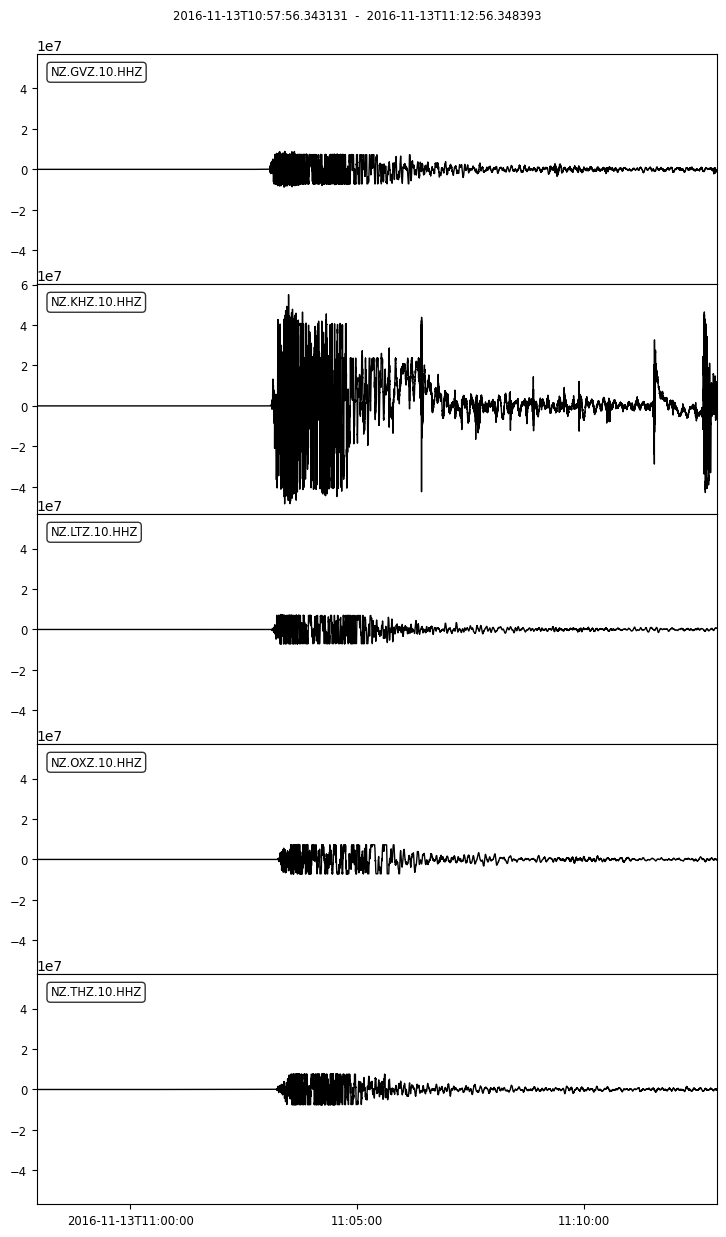

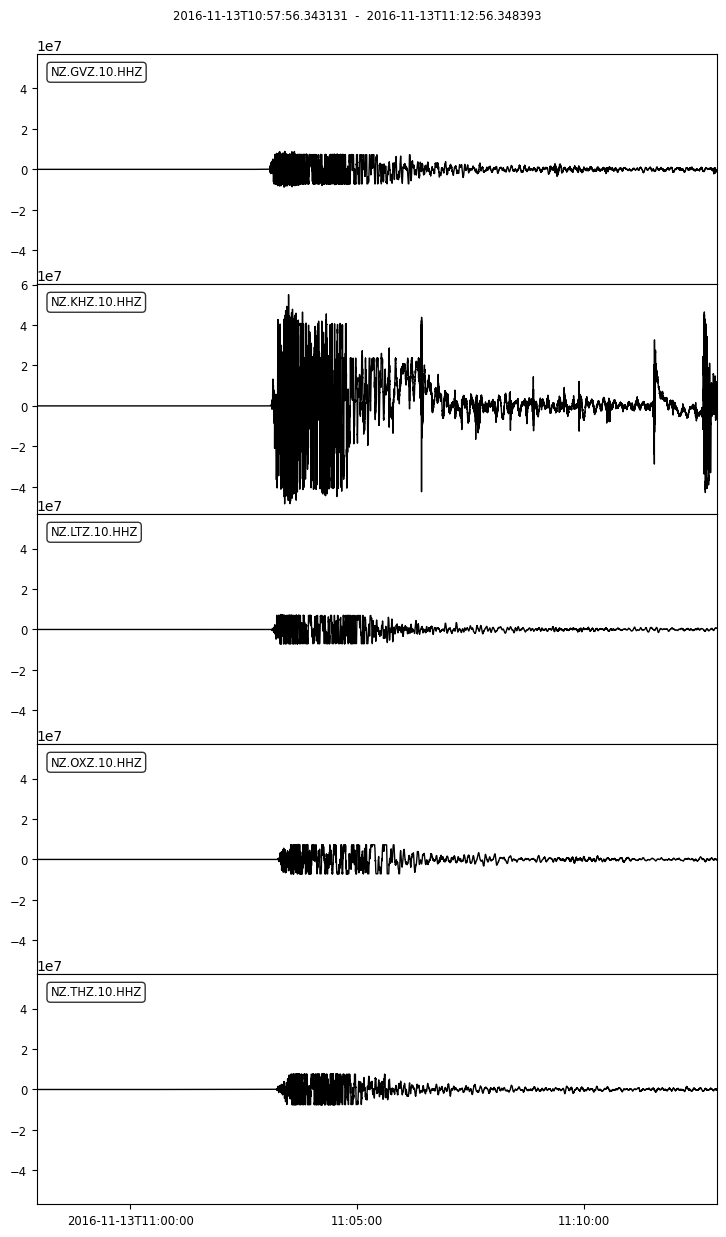

In [7]:
st = Stream()

for network in inventory:
    for station in network:
        try:
            st += client.get_waveforms(network.code, station.code, "*", "HHZ",
                                       otime-300, otime + 600)
        except:
            pass

print(st)
st.plot()